<h1 align = 'center'> Linear Algebra - Numerical Computation</h1>

In [2]:
# Import necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h1 align ='center'> Part 1 - Advanced Linear Algebra Operations</h1>

In [2]:
# A function to print matrix in pretty format
def matprint(mat, fmt="g"): 
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# 1. Gershgorin's Theorem

Let A be an $n x n$ matrix of real or complex numbers. For k = 1,...,n: let

\begin{equation}
r_{k} = \sum_{j=1,j≠k}^{n} |a_{kj}| \tag{1}
\end{equation}

Let $C_{k}$ be the circle of radius $r_{k}$ centered at ($a_{k}$,$b_{k }$), where $a_{kk}$ = $a_{k}$ + $ib_{k}$. Then each eigenvalue of A, when plotted as a point in the complex plane, lies on or within one of the circles $C_{1}$,...,$C_{n}$.

The circles $C_{k}$ are called Gershgorin circles. For the radius of $C_{k}$, read across row k and add the magnitudes of the row elements, omitting the diagonal element $a_{kk}$. The center of $C_{k}$ is
$a_{kk}$, plotted as a point in the complex plane. If the Gershgorin circles are drawn and the disks they bound are shaded, then we have a picture of a region containing all of the eigenvalues of A.

In [5]:
n = int(input('Enter Size of Square Matrix: '))
rows = []
for row in range(n):
    print("\nRow #{}: ".format(row + 1))
    elements = []
    for element in range(n):
        complexNumber = input('Element #{}: '.format(element + 1))
        elements.append(complex(''.join(complexNumber.split())))
    rows.append(elements)
rows = np.array(rows)
print("\nMatrix:\n")
matprint(rows)

Enter Size of Square Matrix: 4

Row #1: 
Element #1: 12j
Element #2: 1
Element #3: 9
Element #4: -4

Row #2: 
Element #1: 1
Element #2: -6
Element #3: 1+j
Element #4: -1

Row #3: 
Element #1: 4
Element #2: 1
Element #3: -1
Element #4: 4j

Row #4: 
Element #1: 1-3j
Element #2: -9
Element #3: 1
Element #4: 4-7j

Matrix:

0+12j   1+0j   9+0j  -4+0j  
 1+0j  -6+0j   1+1j  -1+0j  
 4+0j   1+0j  -1+0j   0+4j  
 1-3j  -9+0j   1+0j   4-7j  


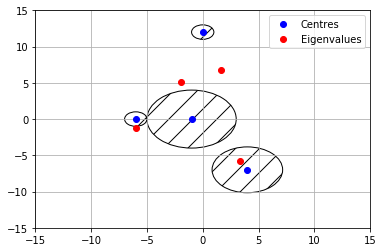


Given Matrix:

0+12j   1+0j   9+0j  -4+0j  
 1+0j  -6+0j   1+1j  -1+0j  
 4+0j   1+0j  -1+0j   0+4j  
 1-3j  -9+0j   1+0j   4-7j  

Eigenvalues of Matrix: 
 [ 3.31177219-5.7791001j   1.65381459+6.78889133j -1.96469071+5.16730981j
 -6.00089608-1.17710104j]


In [6]:
def legend_without_duplicate_labels(ax):  # handle duplicated values in plot legend
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
    
circleCentres = []
circleRadii = []
for index in range(n):
    circleCentres.append((np.array(rows)[index][index].real,np.array(rows)[index][index].imag))
    circleRadii.append(abs(([np.array(rows)[index][element] for element in range(n) if element != index][0])))

fig, axes = plt.subplots()
    
for index in range(n):  # plot circles and their centres
    circle = plt.Circle((circleCentres[index]),circleRadii[index],fill=False,hatch ='/')
    plt.plot(circleCentres[index][0],circleCentres[index][1],'bo',color='blue',label='Centres')
    axes.add_patch(circle)
    
plt.xlim(-15,15)
plt.ylim(-15,15)

eigenvalues = np.linalg.eigvals(rows)   # store eigenvalues of matrix
for eigenvalue in eigenvalues:   # plot eigenvalue points, to show where they lie
    plt.plot(eigenvalue.real,eigenvalue.imag,'bo',color='red',label='Eigenvalues')
    
legend_without_duplicate_labels(axes)

plt.grid()
plt.show()

print("\nGiven Matrix:\n")
matprint(rows)
print("\nEigenvalues of Matrix: \n",eigenvalues)

Gershgorin's theorem is not intended as an approximation scheme, since the Gershgorin circles may have large radii. For some problems, however, just knowing some information about possible locations of eigenvalues can be important. For example, in studies of the stability of fluid flow, it is important to know whether there are eigenvalues in the right half-plane.

# 2. Quadratic Parabola by Least Squares Method

Our method of curve fitting can be generalized from a polynomial y = a + bx to a polynomial of degree m.

\begin{equation}
p(x) = b_{0} + b_{1}x + ... + b_{m}x^{m} \tag{2}
\end{equation}

where m ≤ n - 1. Then q takes the form:

\begin{equation}
q = \sum_{j=1}^{n}(y_{j} - p(x_{j}))^{2} \tag{3}
\end{equation}

The normal equations (summation 1 to n) are:

\begin{equation}
b_{0}n + b_{1} \sum x_{j} + b_{2} \sum x_{j}^{2} = \sum y_{j} \tag{4}
\end{equation}

\begin{equation}
b_{0} \sum x_{j} + b_{1} \sum x_{j}^{2} + b_{2} \sum x_{j}^{3} = \sum x_{j}y_{j} \tag{5}
\end{equation}

\begin{equation}
b_{0} \sum x_{j}^{2} + b_{1} \sum x_{j}^{3} + b_{2} \sum x_{j}^{4} = \sum x_{j}^{2}y_{j} \tag{6}
\end{equation}

Number of Points: 5
Point #1: 0 5
Point #2: 2 4
Point #3: 4 1
Point #4: 6 6
Point #5: 8 7


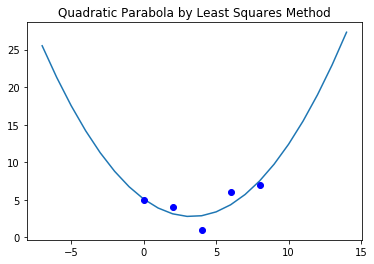

Equation of Parabola: y = 5.114285714285742 + -1.4142857142857075x + 0.21428571428571308x^2


In [7]:
n = int(input('Number of Points: '))
if n < 3:
    print('At least 3 points required.')
else:
    points = []
    for point in range(n):  # take all points input from user
        points.append(tuple(map(float,input('Point #{}: '.format(point + 1)).split())))
    row1 = np.array([n,np.transpose(np.array(points))[0].sum(),(np.transpose(np.array(points))[0]**2).sum()])
    row2 = np.array([np.transpose(np.array(points))[0].sum(),(np.transpose(np.array(points))[0]**2).sum(),(np.transpose(np.array(points))[0]**3).sum()])
    row3 = np.array([(np.transpose(np.array(points))[0]**2).sum(),(np.transpose(np.array(points))[0]**3).sum(),(np.transpose(np.array(points))[0]**4).sum()])
    # LHS of all three normal equations    
    
    matrix = np.concatenate([row1,row2,row3]).reshape(3,3) # matrix representing normal equations
    matrix = np.linalg.inv(matrix)  # take matrix to RHS, i.e., invert
    
    RHS_matrix = np.array([np.transpose(np.array(points))[1].sum(),np.matmul(np.transpose(np.array(points))[0],np.transpose(np.array(points))[1]),np.matmul(np.transpose(np.array(points))[0]**2,np.transpose(np.array(points))[1])])
    # RHS of normal equations
    
    coefficients = np.matmul(matrix,RHS_matrix)
    
    a= []
    b = []
    
    for x in range(-7,15,1):
        y = coefficients[0] + coefficients[1]*x + coefficients[2]*(x**2)
        a.append(x)
        b.append(y)
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(a,b)
    plt.plot(np.array(points).transpose()[0],np.array(points).transpose()[1],'bo')
    plt.title('Quadratic Parabola by Least Squares Method')
    plt.show()
    print("Equation of Parabola: y = {} + {}x + {}x^2".format(coefficients[0],coefficients[1],coefficients[2]))

# 3. Singular Value Decomposition (SVD)

The singular value decomposition of a matrix A is the factorization of A into the
product of three matrices A = $UDV^{T}$ where the columns of U and V are orthonormal and
the matrix D is diagonal with positive real entries.

Let A be an $n×d$ matrix with singular vectors $v_{1}, v_{2},..., v_{r}$ and corresponding singular values $σ_{1}, σ_{2},..., σ_{r}$. Then $u_{i}$ = $\frac{1}σ_{i}Av_{i}$, for i = 1, 2,..., r, are the left singular vectors and A can be decomposed into a sum of rank one matrices as

\begin{equation} 
A = \sum_{i=1}^{r}σ_{i}u_{i}v_{i}^{T} \tag{7}
\end{equation}

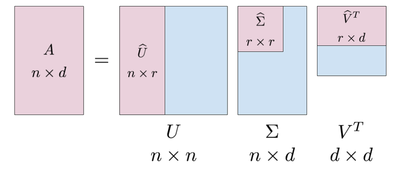

In [11]:
rows = int(input("Enter Number of Rows: "))
A = []
for row in range(rows):
    A.append(list(map(float,input('\nRow #{}: '.format(row + 1)).split())))
A = np.array(A)

SVD = np.linalg.svd(A)
print('\nLeft Singular Matrix (U):\n')
matprint(SVD[0])
print('\nDiagonal Matrix (D):\n')
matprint(np.matmul(np.identity(10)[:A.shape[0],:A.shape[1]],np.diag(SVD[1])))
print('\nRight Singular Matrix (V^T):\n')
matprint(SVD[2])

Enter Number of Rows: 3

Row #1: 1 1

Row #2: 0 1

Row #3: -1 1

Left Singular Matrix (U):

-0.57735  -0.707107   0.408248  
-0.57735          0  -0.816497  
-0.57735   0.707107   0.408248  

Diagonal Matrix (D):

1.73205        0  
      0  1.41421  
      0        0  

Right Singular Matrix (V^T):

-0  -1  
-1  -0  


# 4. Straight Line by Least Squares Method

The straight line y = a + bx should be fitted through the given points ($x_{1}$,$y_{1}$),($x_{2}$,$y_{2}$),...,($x_{n}$,$y_{n}$) so that the sum of the squares of the distances of those points from the straight line is minimum, where the distance is measured in the vertical direction (the y-direction).

The point on the line with abscissa $x_{j}$ has the ordinate $a + bx_{j}$ Hence its distance from ($x_{j}$,$y_{j}$) is $|y_{j} - a - bx_{j}|$ and that sum of squares is:

\begin{equation}
q = \sum_{j=1}^{n}(y_{j}-a-bx_{j})^{2} \tag{8}
\end{equation}

A necessary condition for q to be minimum is:

\begin{equation}
\frac {\partial q}{\partial a} = -2\sum(y_{j}-a-bx_{j})=0 \tag{9}
\end{equation}

\begin{equation}
\frac {\partial q}{\partial b} = -2\sum x_{j}(y_{j}-a-bx_{j})=0 \tag{10}
\end{equation}

Writing each sum as three sums, and taking one of them to the right, we obtain the result:

\begin{equation}
an + b \sum x_{j} = \sum y_{j} \tag{11}
\end{equation}

\begin{equation}
a \sum x_{j} + b \sum x_{j}^{2} = \sum x_{j}y_{j} \tag{12}
\end{equation}

These equations are called the normal equations of our problem.

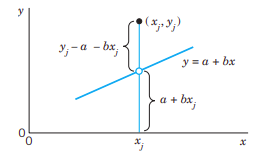

Number of Points: 4
Point #1: -1.3 0.103
Point #2: -0.1 1.099
Point #3: 0.2 0.808
Point #4: 1.3 1.897


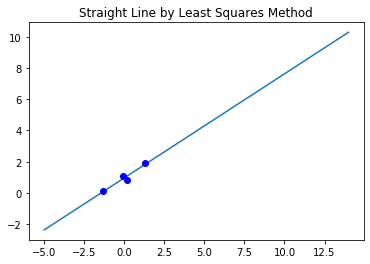

Equation of Line: y = 0.6670240700218817x + 0.9600743982494531


In [10]:
n = int(input('Number of Points: '))
if n < 2:
    print('At least 2 points required.')
else:
    points = []
    for point in range(n): # take all points input from user
        points.append(tuple(map(float,input('Point #{}: '.format(point + 1)).split())))
        
    row1 = np.array([n,np.transpose(np.array(points))[0].sum()]) # LHS of first normal equation
    row2 = np.array([np.transpose(np.array(points))[0].sum(),(np.transpose(np.array(points))[0]**2).sum()])
    # LHS of second normal equation
    
    matrix = np.concatenate([row1,row2]).reshape(2,2)  # matrix representing both normal equations
    matrix = np.linalg.inv(matrix)  # take to RHS, i.e., invert
    
    RHS_matrix = np.array([np.transpose(np.array(points))[1].sum(),np.matmul(np.transpose(np.array(points))[0],np.transpose(np.array(points))[1])])
    # RHS of both normal equations
        
    coefficients = np.matmul(matrix,RHS_matrix) # product of inverted matrix and RHS matrix will give coefficients
    
    a= []
    b = []
    
    for x in range(-5,15,1):
        y = coefficients[0] + coefficients[1]*x
        a.append(x)
        b.append(y)
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(a,b)
    plt.plot(np.array(points).transpose()[0],np.array(points).transpose()[1],'bo')
    plt.title('Straight Line by Least Squares Method')
    plt.show()
    print('Equation of Line: y = {}x + {}'.format(coefficients[1],coefficients[0]))

# 5. Validating Triangle Inequality of Norm of an n-Vector

The Euclidean norm of an n-vector x (named after the Greek mathematician Euclid), denoted ||x||, is the squareroot of the sum of the squares of its elements.
Other less widely used terms for the Euclidean norm of a vector are the magnitude, or length, of a vector.
When x is a scalar, i.e., a 1-vector, the Euclidean norm is the same as the absolute value of x.

The Euclidean norm can be considered a generalization or extension of the absolute value or magnitude, that applies to vectors. The double bar notation is meant to suggest this.

Properties of Norm:
    
1. Non-negative homogeneity, i.e., ||kx|| = |k| ||x||, where k is a scalar.
2. Triangle inequality, i.e., ||x + y|| ≤ ||x|| + ||y||
3. Non-negativity, i.e., ||x|| ≥ 0
4. Definiteness, i.e., ||x|| = 0 only if x = 0

A useful formula for the norm of the sum of two vectors x and y is:

\begin{equation}
||x + y|| = \sqrt {||x||^{2} + 2x^{T}y + ||y||^{2}} \tag{13}
\end{equation}


To validate: \begin{equation}
||x + y|| ≤ ||x|| + ||y|| \tag{14}
\end{equation}

In [7]:
v1 = np.array(list(map(int,input('Vector 1: ').split())))
v2 = np.array(list(map(int,input('Vector 2: ').split())))

_x_ = np.sqrt(np.matmul(v1,v1.transpose())) # norm of v1
_y_ = np.sqrt(np.matmul(v2,v2.transpose())) # norm of v2

print('\nLet v = (v1 + v2),hence norm of v = ||v|| =',np.sqrt((np.square(_x_) + np.square(_y_) + 2*np.matmul(v1.transpose(),v2))))
print('\n||v1|| =',_x_)
print('\n||v2|| =',_y_)
print('\nHence,we have validated that the Euclidean norm of a sum of two vectors is no more than the sum of their norms, i.e.,||x + y|| ≤ ||x|| + ||y||')

Vector 1: 1 2
Vector 2: 3 4

Let v = (v1 + v2),hence norm of v = ||v|| = 7.211102550927978

||v1|| = 2.23606797749979

||v2|| = 5.0

Hence,we have validated that the Euclidean norm of a sum of two vectors is no more than the sum of their norms, i.e.,||x + y|| ≤ ||x|| + ||y||


<h1 align ='center'> Part 2 - Plot New Basis for 2D Matrix</h3>

In [12]:
# Set default basis for 2D matrix

e1 = np.array([1,0])
e2 = np.array([0,1])
basis = np.concatenate((e1,e2)).reshape((len(e1),2))

In [13]:
# Take new basis vectors' input so as to define new basis

print('Enter New Basis Vectors:\n')
v1 = np.array(list(map(int,input('Vector 1: ').split())))
v2 = np.array(list(map(int,input('Vector 2: ').split())))
newBasis = np.concatenate((v1,v2)).reshape(2,2).transpose()

Enter New Basis Vectors:

Vector 1: 2 1
Vector 2: 1 2


Enter Coordinates of Point: 3 2


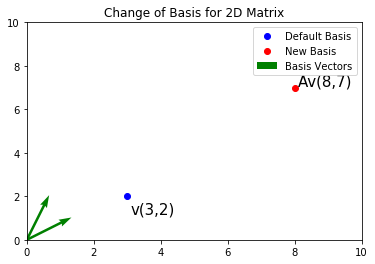

In [14]:
# Take a point whose coordinates with respect to new basis are known
# Find coordinates of same point with respect to default basis

defaultBasisPoint = np.array(list(map(int,input('Enter Coordinates of Point: ').split())))
newBasisPoint = np.matmul(newBasis,defaultBasisPoint)

# Select x and y coordinates of point from NumPy arrays to prepare for plotting
# Plot point with respect to both bases

xOld = defaultBasisPoint[0]
yOld = defaultBasisPoint[1]
xNew = newBasisPoint[0]
yNew = newBasisPoint[1]

plt.plot(xOld,yOld,'bo')
plt.plot(xNew,yNew,'bo',color='red')

V = np.array([v1,v2])
origin = [0], [0]

plt.quiver(*origin, V[:,0], V[:,1], color=['g','g'], scale = 15)  # Basis vectors

plt.xlim(0,10)   # Range of x to show on graph
plt.ylim(0,10)   # Range of y to show on graph

plt.text(xOld+0.1,yOld-0.8,f"v({xOld},{yOld})",fontsize = 15)
plt.text(xNew+0.1,yNew+0.1,f"Av({xNew},{yNew})",fontsize = 15)

plt.title('Change of Basis for 2D Matrix')

plt.legend(['Default Basis','New Basis','Basis Vectors'])

<h1 align = 'center'> References </h1>

1. Advanced Engineering Mathematics (10th Edition) - Erwin Kreyszig
2. Advanced Engineering Mathematics - Peter V. O'Neil
3. MIT OpenCourseWare
4. Linear Algebra (Second Edition) - V. Sahai, V. Bist